### 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filepath =  '/content/drive/MyDrive/Colab/file/total_review_all_tokens.csv'

In [3]:
import io
import pandas as pd

In [4]:
df = pd.read_csv(filepath)

In [5]:
df

,product_name,rating,skin_type,review,tokens,label
0,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,제품은 정말 사용해보시라고 추천드리고싶어요진짜 좋은 제품이거든요사춘기때 여...,"['제품', '은', '정말', '사용', '하', '아', '보', '시', '라...",1
1,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,간단정리 자극없이 무난함 봄여름가을에 적당한 수분감 겨...,"['간단', '정리', '자극', '없이', '무난', '하', 'ㅁ', '봄여름'...",1
2,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,나의 피부상태 복합성 트러블 조금만 자극적이면 피부 뒤집어짐 장점 여드름...,"['나', '의', '피부', '상태', '복합성', '트러블', '조금', '만'...",1
3,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,지성,또 샀어요 진짜 닥터지 최고입니다 건성분들이 쓰시기에는 너무 빨리 날아가...,"['또', '사', '았', '어요', '진짜', '닥터', '지', '최고', '...",1
4,[증량]닥터지 레드 블레미쉬 클리어 수딩크림 기획 (본품70ml+30ml 추가 증정),5,복합성,닥터지 크림은 워낙 유명하기도 하고 성분이 순하고 진정효과가 좋아서 꾸준히 구매해왔...,"['닥터', '지', '크림', '은', '워낙', '유명', '하', '기', '...",1
...,...,...,...,...,...,...
92460,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,최애 입니다이제 이것만 쓸거예요또사러 가야지 눈누난나 신난다,"['최', '애', '입', '니다', '이제', '이것', '만', '쓰', 'ㄹ...",1
92461,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,자극이 없고 일단은 너무 촉촉해서 좋아요 이것만 쓰게 될것같아,"['자극', '이', '없', '고', '일단', '은', '너무', '촉촉', '...",1
92462,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,배송도 빠르고 세일할 때 사야할거 같아서 샀어요송악크림 건성한테 정말 좋을거같아요,"['배송', '도', '빠르', '고', '세일', '하', 'ㄹ', '때', '사...",1
92463,밀크터치 서양송악 진정크림+송악점보패드(60매),5,None,가벼운제형이고 끈적거리지 않아서 좋았어요 그리고 진정에도 좋습니다,"['가볍', 'ㄴ', '제', '형', '이', '고', '끈적거리', '지', '...",1


In [14]:
df_=df.loc[df['label']!=-1] #별점값이 4였던 값들 제외

In [15]:
df_=df_.loc[df['skin_type']=='None'] #NoneType만

In [ ]:
df_

In [17]:
df_=df_.reset_index(drop=True)

In [18]:
df_['label'].value_counts()

1    54089
0     3942
Name: label, dtype: int64

In [19]:
df_ = df_.loc[:,["tokens","label"]]

In [20]:
from ast import literal_eval

In [21]:
df_['tokens'] = df_['tokens'].apply(literal_eval)

### TF-IDF

In [22]:
from gensim import corpora, models

In [23]:
below = len(df_)//100

In [24]:
dictionary = corpora.Dictionary(df_['tokens'])
dictionary.filter_extremes(no_below=below)
bow_corpus = [dictionary.doc2bow(text) for text in df_['tokens']]
        
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [25]:
len_dic = len(dictionary)
data_size = len(corpus_tfidf)

print(len_dic, data_size)

692 58031


In [26]:
feature_list = [[0]*len_dic for i in range(data_size)] #len(dictionary)*len(data)

In [27]:
for i in range(data_size):
    for j in corpus_tfidf[i]:
        feature_list[i][j[0]] = j[1]

In [28]:
label = df_['label'].values.tolist()

In [29]:
import joblib

In [30]:
joblib.dump(dictionary, '/content/drive/MyDrive/Colab/file/None_token_dictionary.pkl')

['/content/drive/MyDrive/Colab/file/None_token_dictionary.pkl']

### UnderSampling

In [31]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 8.6 MB/s 
     |████████████████████████████████| 199 kB 84.7 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [32]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_list, label, test_size=0.3, random_state=123)

In [34]:
from collections import Counter

In [35]:
undersample = RandomUnderSampler(sampling_strategy='majority')
under_X, under_y = undersample.fit_resample(X_train, y_train)

print(Counter(y_train))
print(Counter(under_y))

Counter({1: 37897, 0: 2724})
Counter({0: 2724, 1: 2724})


### Logistic Regression

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression

In [38]:
model =  LogisticRegression(penalty="elasticnet", solver="saga")
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio" :[ .1, .5, .7, .9, .95, .99, 1]}
# define search
grid_search = GridSearchCV(model, param_grid, cv=cv, n_jobs=-1, scoring='f1')
# perform the search
results = grid_search.fit(under_X, under_y)

# summarize
print('best_score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

best_score: 0.785
Config: {'C': 1, 'l1_ratio': 0.1}


In [39]:
import joblib
joblib.dump(results.best_estimator_, '/content/drive/MyDrive/Colab/file/None_lr_alltoken_model.pkl')

['/content/drive/MyDrive/Colab/file/None_lr_alltoken_model.pkl']

### best_estimator_불러오기

In [40]:
import joblib

In [41]:
loaded_model = joblib.load('/content/drive/MyDrive/Colab/file/None_lr_alltoken_model.pkl')

### 성능평가

In [42]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, f1_score, classification_report

In [43]:
print('model.coef_.sum():',loaded_model.coef_.sum())
print('model.intercept_:',loaded_model.intercept_)

pred_y = loaded_model.predict(X_test)
print('r2_score: ',r2_score(y_test,pred_y))
print('mse: ', mean_squared_error(y_test,pred_y))
print('accuracy: ', accuracy_score(y_test, pred_y))
print('f1: ', f1_score(y_test, pred_y))

model.coef_.sum(): 68.04801585113589
model.intercept_: [-0.19013463]
r2_score:  -2.3307174537731137
mse:  0.2167145318782309
accuracy:  0.7832854681217691
f1:  0.8707655420448707


In [44]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, pred_y, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.21      0.76      0.33      1218
     class 1       0.98      0.79      0.87     16192

    accuracy                           0.78     17410
   macro avg       0.59      0.77      0.60     17410
weighted avg       0.92      0.78      0.83     17410



In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
tr_pred_y = loaded_model.predict(under_X)
cm_tr = confusion_matrix(under_y,tr_pred_y)

Text(33.0, 0.5, 'Actual')

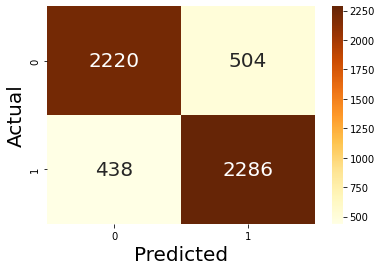

In [47]:
sns.heatmap(cm_tr, annot=True, annot_kws={"size": 20}, cmap='YlOrBr',fmt='d')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [48]:
cm_te = confusion_matrix(y_test, pred_y)

Text(33.0, 0.5, 'Actual')

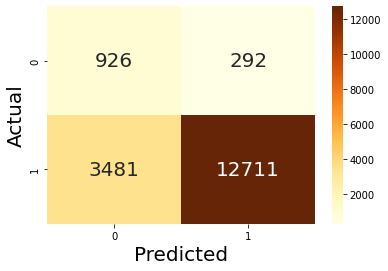

In [49]:
sns.heatmap(cm_te, annot=True, annot_kws={"size": 20}, cmap='YlOrBr',fmt='d')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

### 단어 극성 확인

In [50]:
feature_zip = []

In [51]:
for idx, val in enumerate(loaded_model.coef_[0]):
    feature_zip.append((idx, val))

In [52]:
feature_zip_sorted = sorted(feature_zip, key = lambda item: item[1])

In [53]:
feature_zip_sorted

[(56, -4.081971765796337),
 (188, -3.803116896690589),
 (40, -3.4746170878907208),
 (361, -3.4316511283662257),
 (451, -3.2759309468866142),
 (520, -3.192596782233346),
 (53, -2.360651135987763),
 (527, -2.3417730065115663),
 (75, -2.174635590883843),
 (209, -2.1331404363259643),
 (590, -1.964548321555155),
 (232, -1.9550909681553874),
 (8, -1.9142696376956274),
 (325, -1.8968246115112792),
 (600, -1.8059905821672257),
 (314, -1.7509284793262423),
 (183, -1.734644908258668),
 (262, -1.7333051684980985),
 (245, -1.7001152087886386),
 (211, -1.697169897928906),
 (322, -1.6904519894032155),
 (224, -1.597039090663544),
 (489, -1.5864765443537066),
 (327, -1.5803623027724998),
 (94, -1.5639040800013522),
 (620, -1.563302278372901),
 (234, -1.5538314164773406),
 (506, -1.5476135254317365),
 (420, -1.5174026916840468),
 (187, -1.5162835615875419),
 (593, -1.5070548868080986),
 (242, -1.4988914442827876),
 (630, -1.450061553407873),
 (493, -1.4424866301802706),
 (179, -1.433056248497852),
 (54

In [54]:
dict_sorted_li = []

In [55]:
for ft in feature_zip_sorted:
  dict_sorted_li.append((dictionary[ft[0]],ft[1]))

##### 긍정

In [56]:
sorted(dict_sorted_li[-30:],key = lambda item: item[1],reverse=True)

[('만족', 3.2446022329924276),
 ('딱', 3.0642077783410397),
 ('쓰', 2.627606430919671),
 ('진짜', 2.5703694091599836),
 ('촉촉', 2.481306482714336),
 ('강추', 2.10835336627363),
 ('정착', 2.054730558559751),
 ('없이', 2.0041154108132115),
 ('짱', 1.9963222669455962),
 ('에요', 1.9283906208736843),
 ('순하', 1.8630885460058375),
 ('최고', 1.850965857933928),
 ('있', 1.8381705895733205),
 ('확실히', 1.8206608649886569),
 ('주름', 1.8154054318401467),
 ('항상', 1.8070373172159218),
 ('광', 1.7869444175088247),
 ('되', 1.7863275975878348),
 ('잘', 1.7825547265654653),
 ('자', 1.780634354134962),
 ('오래', 1.7603288022953887),
 ('째', 1.7404190151977168),
 ('정말', 1.736887954811106),
 ('들', 1.6960487574178555),
 ('환절기', 1.63810661260753),
 ('이것', 1.6261648984111712),
 ('아주', 1.526849011875353),
 ('부담', 1.5171574844862286),
 ('좋아하', 1.509058070965522),
 ('좋아서', 1.4790086698032254)]

##### 부정

In [57]:
dict_sorted_li[:30]

[('안', -4.081971765796337),
 ('모르', -3.803116896690589),
 ('별로', -3.4746170878907208),
 ('못하', -3.4316511283662257),
 ('아쉽', -3.2759309468866142),
 ('그냥', -3.192596782233346),
 ('아니', -2.360651135987763),
 ('비', -2.3417730065115663),
 ('저', -2.174635590883843),
 ('올라오', -2.1331404363259643),
 ('건지', -1.964548321555155),
 ('밀리', -1.9550909681553874),
 ('기', -1.9142696376956274),
 ('어야', -1.8968246115112792),
 ('기대', -1.8059905821672257),
 ('하지만', -1.7509284793262423),
 ('느낌', -1.734644908258668),
 ('따갑', -1.7333051684980985),
 ('좀', -1.7001152087886386),
 ('은데', -1.697169897928906),
 ('듯', -1.6904519894032155),
 ('그런지', -1.597039090663544),
 ('물', -1.5864765443537066),
 ('좁쌀', -1.5803623027724998),
 ('겠', -1.5639040800013522),
 ('상품', -1.563302278372901),
 ('부족', -1.5538314164773406),
 ('무난', -1.5476135254317365),
 ('음', -1.5174026916840468),
 ('맞', -1.5162835615875419)]

In [58]:
coef_dict_df = pd.DataFrame(dict_sorted_li, columns = ['words','coef'])

In [ ]:
coef_dict_df.to_csv('/content/drive/MyDrive/Colab/file/alltoken_coef_dict.csv',index = False, columns = ['words', 'coef'])

### 문장단위 감성분류

In [59]:
test =  '/content/drive/MyDrive/Colab/file/total_test_tokens.csv'

In [60]:
test_sent = pd.read_csv(test)

In [61]:
test_sent['sen'] = test_sent['sen'].apply(literal_eval)

In [62]:
test_sent['sen'][294]

[('끈적이', 'VV'),
 ('는', 'ETM'),
 ('느낌', 'NNP'),
 ('때문', 'NNB'),
 ('에', 'JKB'),
 ('피부', 'NNG'),
 ('에', 'JKB'),
 ('완전히', 'MAG'),
 ('흡수', 'NNG'),
 ('되', 'XSV'),
 ('는', 'ETM'),
 ('시간', 'NNG'),
 ('은', 'JX'),
 ('좀', 'MAG'),
 ('더디', 'VA'),
 ('ㄴ', 'ETM'),
 ('편', 'NNB'),
 ('이', 'VCP'),
 ('에요', 'EC')]

In [63]:
test_token_list = [[token[0] for token in tokens ] for tokens in test_sent['sen']] 

In [64]:
test_label = test_sent['pos_neg'].values.tolist()

In [65]:
test_corpus = [dictionary.doc2bow(text) for text in test_token_list]
tfidf = models.TfidfModel(bow_corpus)
test_tfidf = tfidf[test_corpus]

In [66]:
len_dic = len(dictionary)
data_size = len(test_tfidf)

print(len_dic, data_size)

692 300


In [67]:
test_feature_list = [[0]*len_dic for i in range(data_size)] #len(dictionary)*len(data)

In [68]:
for i in range(data_size):
    for j in test_tfidf[i]:
        test_feature_list[i][j[0]] = j[1]

In [69]:
pred_sent_y = loaded_model.predict(test_feature_list)

In [70]:
cm = confusion_matrix(test_label, pred_sent_y)

Text(33.0, 0.5, 'Actual')

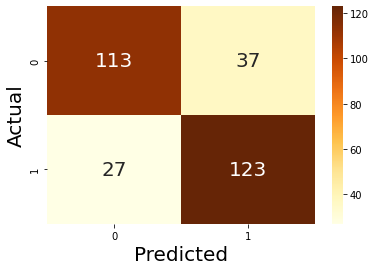

In [71]:
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap='YlOrBr',fmt='d')
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)

In [72]:
print('accuracy: ', accuracy_score(test_label, pred_sent_y))
print('f1: ', f1_score(test_label, pred_sent_y))

accuracy:  0.7866666666666666
f1:  0.7935483870967741


### 문장별로 확인

In [ ]:
score = float(loaded_model.predict(test_feature_list[299:300]))

if(score > 0.5):
  print(" 긍정 리뷰입니다.")
else:
  print("부정 리뷰입니다")

부정 리뷰입니다
